Задание:
- показать понедельную динамику посещаемости сайта за сентябрь-ноябрь 2016. Показатели: визиты, просмотры, среднедневное кол-во визитов на посетителя
- рассчитать по каждой отчётной неделе (пн-вс) изменение за неделю и за год (неделя 2016 г. к той же неделе 2015 г.)
- построить помесячный прогноз трафика проекта на 2017 год (по визитам)
- визуализировать полученные данные


In [1153]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [1154]:
df = pd.read_csv('C:Desktop/data_1.csv', sep=';')
display(df.head())
display(df.info())

,Интервал дат визита,Визиты,Посетители,Просмотры
0,01.01.2015,73 800,66 742,141 136
1,02.01.2015,94 070,85 086,179 118
2,03.01.2015,95 847,86 782,184 094
3,04.01.2015,83 911,75 901,160 691
4,05.01.2015,105 634,94 929,206 353


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Интервал дат визита  1096 non-null   object
 1   Визиты               731 non-null    object
 2   Посетители           731 non-null    object
 3   Просмотры            731 non-null    object
dtypes: object(4)
memory usage: 34.4+ KB


None

In [1155]:
data = df[:731]
data

,Интервал дат визита,Визиты,Посетители,Просмотры
0,01.01.2015,73 800,66 742,141 136
1,02.01.2015,94 070,85 086,179 118
2,03.01.2015,95 847,86 782,184 094
3,04.01.2015,83 911,75 901,160 691
4,05.01.2015,105 634,94 929,206 353
...,...,...,...,...
726,27.12.2016,99 726,90 120,201 104
727,28.12.2016,80 770,72 738,182 035
728,29.12.2016,98 796,89 426,208 137
729,30.12.2016,66 259,60 467,139 121


In [1156]:
def clear(a):
    a = a.replace(' ', '')
    return a 

In [1157]:
data['Визиты'] = data['Визиты'].apply(clear).astype('int')
data['Посетители'] = data['Посетители'].apply(clear).astype('int')
data['Просмотры'] = data['Просмотры'].apply(clear).astype('int')

In [1158]:
data['datetime'] = pd.to_datetime(data['Интервал дат визита'], format = '%d.%m.%Y')
data = data.drop('Интервал дат визита', axis=1).set_index('datetime')

In [1159]:
data.index.is_monotonic

True

In [1160]:
data 

,Визиты,Посетители,Просмотры
datetime,,,
2015-01-01,73800,66742,141136
2015-01-02,94070,85086,179118
2015-01-03,95847,86782,184094
2015-01-04,83911,75901,160691
2015-01-05,105634,94929,206353
...,...,...,...
2016-12-27,99726,90120,201104
2016-12-28,80770,72738,182035
2016-12-29,98796,89426,208137


## Понедельная динамика посещаемости сайта за сентябрь-ноябрь 2016г.

In [1161]:
data_week = data.copy()
data_week = data_week.resample('1W').sum()
data_week = data_week['2016-09':'2016-11']

Text(0.5, 1.0, 'Динамика посещаемости сайта по неделям')

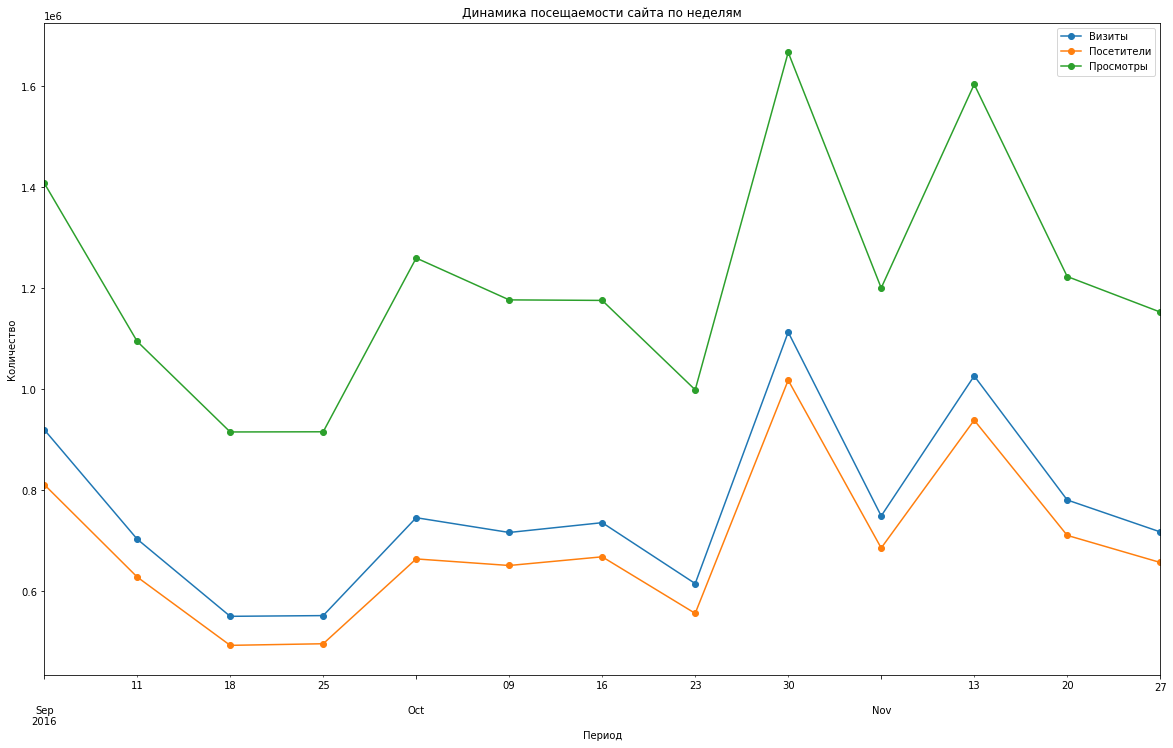

In [1162]:
h1 = data_week.plot(figsize=(20,12), marker='o')
h1.set_ylabel('Количество')
h1.set_xlabel('Период')
h1.set_title('Динамика посещаемости сайта по неделям')

Видим, что на неделе с 23.10 по 30.10 был большой прирост просмотров. Возможно, это связано с рекламной компанией. 
Например, если это данные какого-нибудь интернет магазина, то рост с 20х чисел объясняется зарплатой, ее обычно начисляют в перод с 20 по 25 число месяца. А 11.11 черная пятница, что и повлекло увеличение просмотров. Просмотров почти в 2 раза больше, чем поситетелей. Опять же, если это интернет магазин, это объясняется тем, что люди скроллят сайт и выбирают подходящий товар.

In [1163]:
data_week['Визиты'].sum()/data_week['Посетители'].sum()

1.10558255510024

In [1164]:
visits = data['2016-09-01':'2016-11-30']['Визиты']
users = data['2016-09-01':'2016-11-30']['Посетители']
days = len(data['2016-09-01':'2016-11-30'])

In [1165]:
(visits/users).sum()/days

1.1010949151218716

Среднедневное количеcтво визитов на посетителя за период сентября по ноябрь 2016 года составляет 1 визит на посетителя. Что видно и по графику.

## Pассчитать по каждой отчётной неделе (пн-вс) изменение за неделю и за год (неделя 2016 г. к той же неделе 2015 г.)

### Визиты

In [1166]:
data_week_1 = data.copy()
data_week_1 = data_week_1.resample('1W').sum()
#data_week_1['week'] = data_week_1.index.week 
data_week_1_2015 = data_week_1[:'2015-12-31']
data_week_1_2016 = data_week_1['2015-12-31':'2016-12-31']

In [1167]:
data_week_1_2015 = data_week_1_2015.reset_index(drop=True)
data_week_1_2016 = data_week_1_2016.reset_index(drop=True)

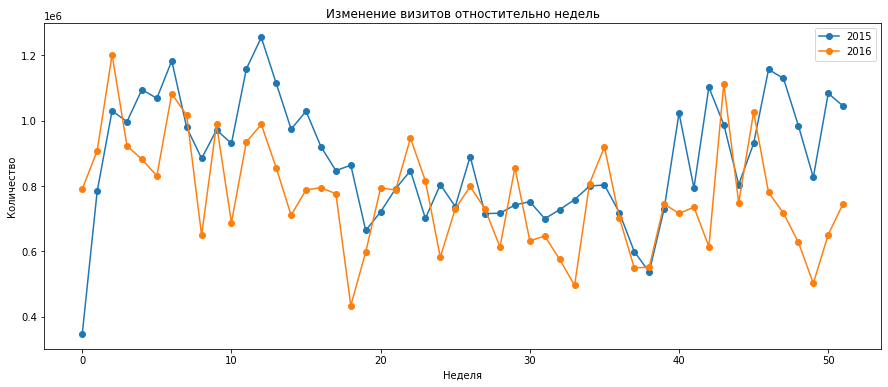

In [1168]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
ax.plot(data_week_1_2015['Визиты'], label='2015', marker='o')
ax.plot(data_week_1_2016['Визиты'], label='2016', marker='o')
plt.legend()
plt.title('Изменение визитов отностительно недель')
plt.xlabel('Неделя')
plt.ylabel('Количество')
plt.show()

Динамика изменения в 2016 году похожа на динамику в 2015 году. 

Text(0, 0.5, 'Разница')

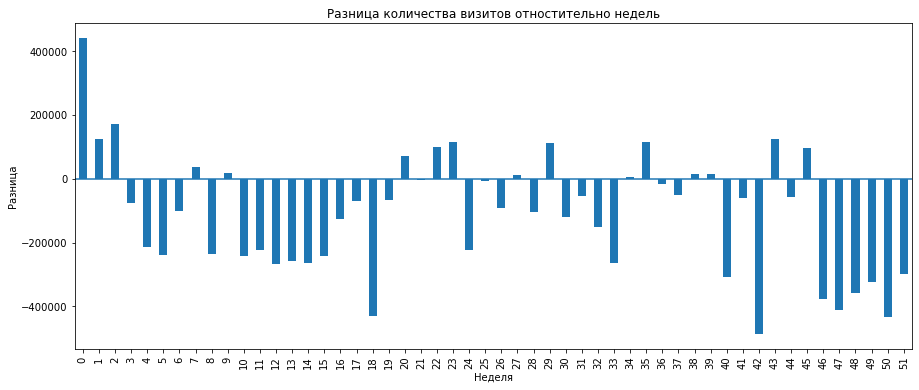

In [1169]:
ax = (data_week_1_2016['Визиты']-data_week_1_2015['Визиты'])
ax.plot(figsize=(15, 6), kind='bar')
plt.axhline(y=0, xmin=0, xmax=1)
plt.title('Разница количества визитов отностительно недель')
plt.xlabel('Неделя')
plt.ylabel('Разница')

По второму графику видно, что если брать разницу между визитами в 2016 и 2015 году (2016 минус 2015) и брать по неделям, то в 2015 году визитов было больше.

In [1170]:
print('Количество визитов в 2016')
data_week_1_2016['Визиты'].sum()

Количество визитов в 2016


40111908

In [1171]:
print('Количество визитов в 2015')
data_week_1_2015['Визиты'].sum()

Количество визитов в 2015


45764136

Разница : визиты 2015 - визиты 2016 = 5 652 228 шт. На это количество визитов в 2015 году было больше.

### 	Посетители

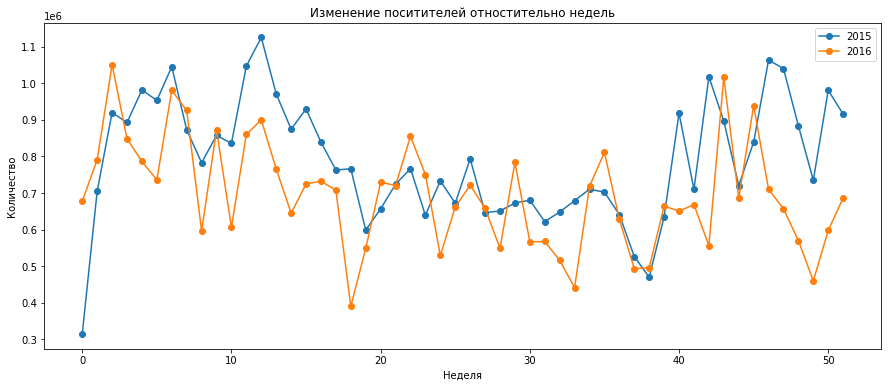

In [1172]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
ax.plot(data_week_1_2015['Посетители'], label='2015', marker='o')
ax.plot(data_week_1_2016['Посетители'], label='2016', marker='o')
plt.legend()
plt.title('Изменение поситителей отностительно недель')
plt.xlabel('Неделя')
plt.ylabel('Количество')
plt.show()

Text(0, 0.5, 'Разница')

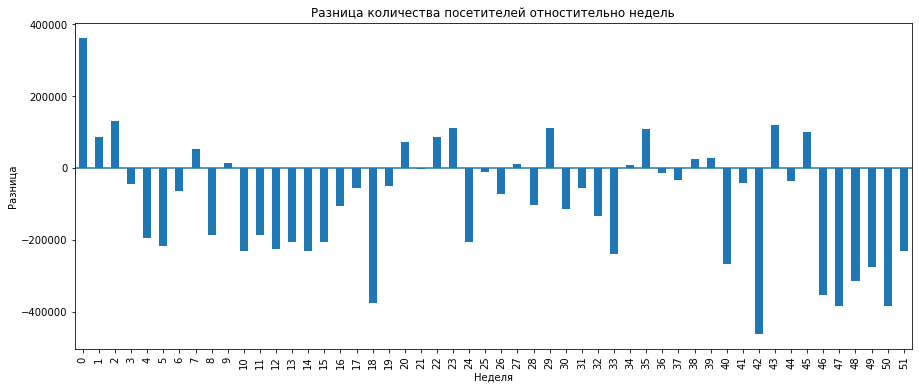

In [1173]:
ax = (data_week_1_2016['Посетители']-data_week_1_2015['Посетители'])
ax.plot(figsize=(15, 6), kind='bar')
plt.axhline(y=0, xmin=0, xmax=1)
plt.title('Разница количества посетителей отностительно недель')
plt.xlabel('Неделя')
plt.ylabel('Разница')

По посетителям ситуация очень похожа на визиты.

In [1174]:
print('Количество посетителей в 2016')
data_week_1_2016['Посетители'].sum()

Количество посетителей в 2016


36201199

In [1175]:
print('Количество посетителей в 2015')
data_week_1_2015['Посетители'].sum()

Количество посетителей в 2015


41065888

In [1176]:
data_week_1_2016['Визиты'].sum()/data_week_1_2016['Посетители'].sum()

1.1080270573358635

In [1177]:
data_week_1_2015['Визиты'].sum()/data_week_1_2015['Посетители'].sum()

1.1144075588965714

Разница : посетители 2015 - посетители 2016 = 4 864 689. На это количество визитов в 2015 году было больше.

Отношение визитов к посетителям:
- в 2016 году 1.1080
- в 2015 году 1.1144

### Просмотры

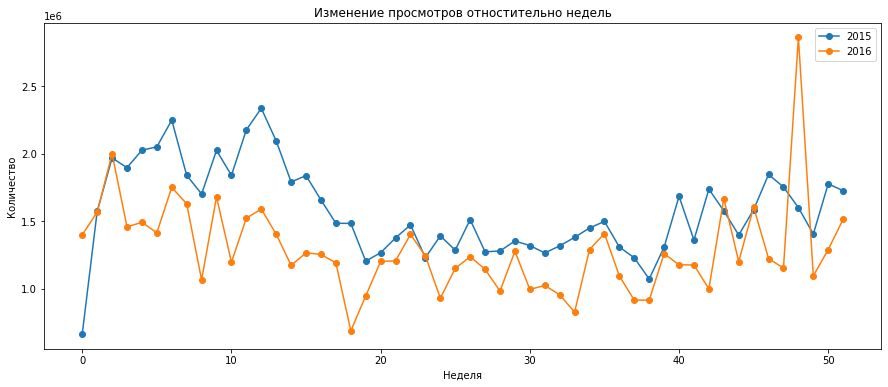

In [1178]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
ax.plot(data_week_1_2015['Просмотры'], label='2015', marker='o')
ax.plot(data_week_1_2016['Просмотры'], label='2016', marker='o')
plt.legend()
plt.title('Изменение просмотров отностительно недель')
plt.xlabel('Неделя')
plt.ylabel('Количество')
plt.show()

Text(0, 0.5, 'Разница')

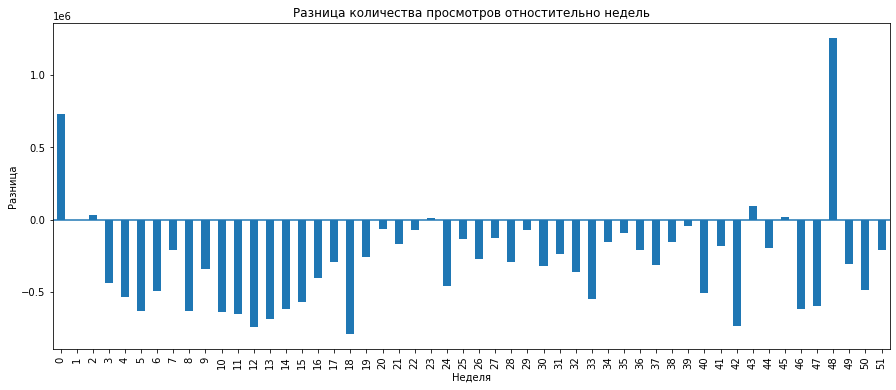

In [1179]:
ax = (data_week_1_2016['Просмотры']-data_week_1_2015['Просмотры'])
ax.plot(figsize=(15, 6), kind='bar')
plt.axhline(y=0, xmin=0, xmax=1)
plt.title('Разница количества просмотров отностительно недель')
plt.xlabel('Неделя')
plt.ylabel('Разница')

В 2016 году просмотров меньше, чем в 2015.

In [1180]:
metric = ['Визиты' ,'Посетители', 'Просмотры']
means = [[data_week_1_2015['Визиты'].sum(), data_week_1_2016['Визиты'].sum(), 
          data_week_1_2016['Визиты'].sum()-data_week_1_2015['Визиты'].sum()],
         [data_week_1_2015['Посетители'].sum(), data_week_1_2016['Посетители'].sum(),
         data_week_1_2016['Посетители'].sum()-data_week_1_2015['Посетители'].sum()],
         [data_week_1_2015['Просмотры'].sum(), data_week_1_2016['Просмотры'].sum(),
         data_week_1_2016['Просмотры'].sum()-data_week_1_2015['Просмотры'].sum()]]
table = pd.DataFrame(data=means, index=metric, columns=['2015', '2016', 'Разница'])
table['Прирост/Убыток в %'] = (table['2016']-table['2015'])/table['2016']*100
table

,2015,2016,Разница,Прирост/Убыток в %
Визиты,45764136,40111908,-5652228,-14.091147
Посетители,41065888,36201199,-4864689,-13.437922
Просмотры,81915218,67094931,-14820287,-22.088535


В 2016 году убыток по всем позициям

### Помесячный прогноз трафика проекта на 2017 год (по визитам)

In [1181]:
data = data[:'2016-12-01']

In [1182]:
target = train['Визиты']

In [1183]:
from pmdarima.arima import auto_arima
decomposition = auto_arima(target, start_p=0, start_q=0,
                          max_p=12, max_q=12, m=12, start_P=1, seasonal=True,
                          d=1, D=1, trace=True, error_action='ignore',
                          suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=231.409, Time=0.13 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=238.706, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=231.303, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=234.627, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=233.255, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=233.303, Time=0.26 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=233.303, Time=0.17 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=232.012, Time=0.12 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=235.303, Time=0.30 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=230.002, Time=0.06 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=232.002, Time=0.13 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=230.315, Time=0.09 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=233.409, Time=0.23 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=234.084, Time=0.14 sec
 ARIMA(1,1,1)(1,1,0)[12]         

In [1184]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(target,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 0, 12))

results = mod.fit()

print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                             Визиты   No. Observations:                   21
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -113.001
Date:                            Mon, 26 Sep 2022   AIC                            230.002
Time:                                    22:43:40   BIC                            230.161
Sample:                                04-01-2015   HQIC                           228.930
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6186      2.037     -0.304      0.761      -4.610       3.373
sigma2      2.086e+11   1.01e-11   

In [1185]:
pred_res = results.get_prediction(start='2017-01-01', end='2017-12-01')
pred_means = pred_res.predicted_mean

In [1186]:
preds = results.get_prediction(start='2017-01-01', end = '2017-12-01')

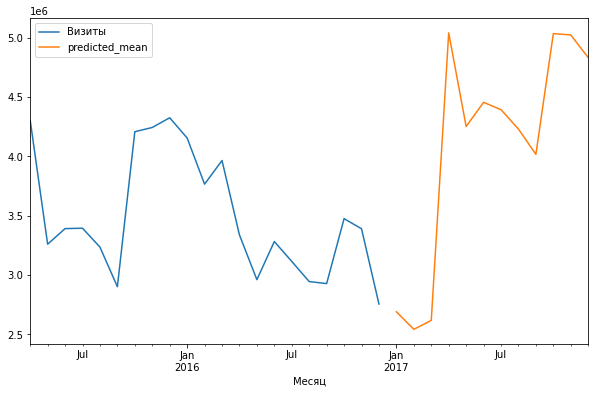

In [1187]:
plt.figure(figsize=(10,6))
target.plot(legend=True)
preds.predicted_mean.plot(legend=True)
plt.xlabel('Месяц')
plt.show()

In [1188]:
preds.predicted_mean.astype('int')

2017-01-01    2690704
2017-02-01    2542304
2017-03-01    2618290
2017-04-01    5041366
2017-05-01    4251989
2017-06-01    4455953
2017-07-01    4393911
2017-08-01    4230697
2017-09-01    4017663
2017-10-01    5034727
2017-11-01    5024141
2017-12-01    4832831
Freq: MS, Name: predicted_mean, dtype: int32